# Sprint 2 - Model Building and Saving✅
---


> Team Id : PNT2022TMID32148 






In [1]:
import numpy as np
import tensorflow as tf
from keras.datasets import mnist
from keras.models import Sequential
from keras import layers
from keras.layers import Dense,Flatten
from keras.layers import Conv2D
from keras.optimizers import Adam
from keras.utils import np_utils
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [2]:
(X_train,y_train),(X_test,y_test) =mnist.load_data()
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


The label value is  6


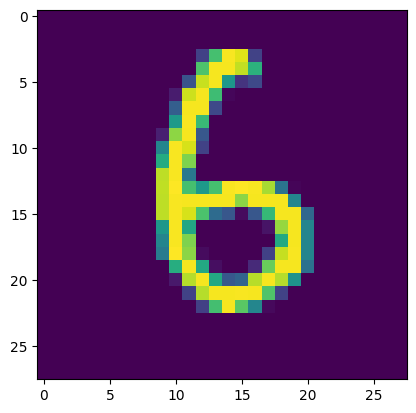

In [3]:
print("The label value is ",y_test[21])
plt.imshow(X_test[21])

The label value is  1


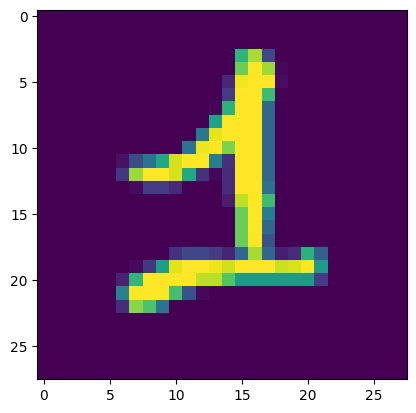

In [4]:
print("The label value is ",y_train[24])
plt.imshow(X_train[24])

In [6]:
X_train = X_train.reshape(60000, 28, 28, 1).astype('float32')
X_test = X_test.reshape(10000, 28, 28, 1).astype('float32')

In [7]:
number_of_classes= 10
y_train = np_utils.to_categorical(y_train,number_of_classes)
y_test = np_utils.to_categorical(y_test,number_of_classes)

In [8]:
print("After encoding the value 6 of y_test[21] become", y_test[21])

After encoding the value 6 of y_test[21] become [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [9]:
model= tf.keras.Sequential()
model.add(Conv2D(64,(3,3),input_shape=(28,28,1),activation='relu'))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(Flatten())
model.add(Dense(number_of_classes,activation='softmax'))

In [10]:
model.compile(loss='categorical_crossentropy',optimizer="Adam", metrics=['accuracy'])

In [11]:
early_stopping = EarlyStopping(monitor='accuracy',
                        patience=3)
reduce_lr = ReduceLROnPlateau(monitor='accuracy',
                        patience=3,
                        factor=0.5,min_lr=0.00001)

callback = [reduce_lr,early_stopping]

In [12]:
model.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=15,batch_size=32,callbacks=callback)

Epoch 1/15
1875/1875 [==============================] - 3404s 2s/step - loss: 0.2026 - accuracy: 0.9542 - val_loss: 0.0955 - val_accuracy: 0.9713 - lr: 0.0010
Epoch 2/15
1875/1875 [==============================] - 141s 75ms/step - loss: 0.0674 - accuracy: 0.9795 - val_loss: 0.1068 - val_accuracy: 0.9705 - lr: 0.0010
Epoch 3/15
1875/1875 [==============================] - 135s 72ms/step - loss: 0.0477 - accuracy: 0.9853 - val_loss: 0.0738 - val_accuracy: 0.9769 - lr: 0.0010
Epoch 4/15
1875/1875 [==============================] - 135s 72ms/step - loss: 0.0346 - accuracy: 0.9884 - val_loss: 0.0936 - val_accuracy: 0.9760 - lr: 0.0010
Epoch 5/15
1875/1875 [==============================] - 135s 72ms/step - loss: 0.0269 - accuracy: 0.9915 - val_loss: 0.1007 - val_accuracy: 0.9740 - lr: 0.0010
Epoch 6/15
1875/1875 [==============================] - 131s 70ms/step - loss: 0.0252 - accuracy: 0.9925 - val_loss: 0.1244 - val_accuracy: 0.9763 - lr: 0.0010
Epoch 7/15
1875/1875 [===================

In [13]:
metrics=model.evaluate(X_test,y_test,verbose=0)
print("loss & accuracy")
print(metrics)

loss & accuracy
[0.2396242916584015, 0.9765999913215637]


In [14]:
prediction=model.predict(X_test[:4])
print(np.argmax(prediction,axis=1))
print(y_test[:4])

1/1 [==============================] - 0s 193ms/step
[7 2 1 0]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [15]:
model.save('digit-recognition.h5')

In [16]:
!tar -zcvf digit-recognition.tar digit-recognition.h5

a digit-recognition.h5
